In [25]:
# Import dependencies
# Handle/Filter warnings
import warnings
warnings.filterwarnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [26]:
# Import/Load dataset
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [76]:
# 1.0 Import the datasets and libraries, check datatype, statistical summary,shape,null values or incorrect imputation.

# Visualize the structure of the data
df.head(30)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,Undergrad,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Undergrad,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Undergrad,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Graduate,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Graduate,0,No,No,No,No,Yes
5,6,37,13,29,92121,4,0.4,Graduate,155,No,No,No,Yes,No
6,7,53,27,72,91711,2,1.5,Graduate,0,No,No,No,Yes,No
7,8,50,24,22,93943,1,0.3,Advanced/Professional,0,No,No,No,No,Yes
8,9,35,10,81,90089,3,0.6,Graduate,104,No,No,No,Yes,No
9,10,34,9,180,93023,1,8.9,Advanced/Professional,0,Yes,No,No,No,No


In [78]:
# Drop ID and ZIP code
df.drop('ID', axis=1)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.60,Undergrad,0,No,Yes,No,No,No
1,45,19,34,90089,3,1.50,Undergrad,0,No,Yes,No,No,No
2,39,15,11,94720,1,1.00,Undergrad,0,No,No,No,No,No
3,35,9,100,94112,1,2.70,Graduate,0,No,No,No,No,No
4,35,8,45,91330,4,1.00,Graduate,0,No,No,No,No,Yes
5,37,13,29,92121,4,0.40,Graduate,155,No,No,No,Yes,No
6,53,27,72,91711,2,1.50,Graduate,0,No,No,No,Yes,No
7,50,24,22,93943,1,0.30,Advanced/Professional,0,No,No,No,No,Yes
8,35,10,81,90089,3,0.60,Graduate,104,No,No,No,Yes,No
9,34,9,180,93023,1,8.90,Advanced/Professional,0,Yes,No,No,No,No


In [32]:
# Convert education to categorical, 1: Undergrad; 2: Graduate;3:  Advanced/Professional
df.Education.replace({ 1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional' }, inplace=True)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,Undergrad,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,Undergrad,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,Undergrad,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,Graduate,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,Graduate,0,0,0,0,0,1


In [34]:
# Convert Personal Loan to categorical, 0: No; 1: Yes
df['Personal Loan'].replace({ 0: 'No', 1: 'Yes' }, inplace=True)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,Undergrad,0,No,1,0,0,0
1,2,45,19,34,90089,3,1.5,Undergrad,0,No,1,0,0,0
2,3,39,15,11,94720,1,1.0,Undergrad,0,No,0,0,0,0
3,4,35,9,100,94112,1,2.7,Graduate,0,No,0,0,0,0
4,5,35,8,45,91330,4,1.0,Graduate,0,No,0,0,0,1


In [35]:
# Convert Securities Account to categorical, 0: No; 1: Yes
df['Securities Account'].replace({ 0: 'No', 1: 'Yes' }, inplace=True)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,Undergrad,0,No,Yes,0,0,0
1,2,45,19,34,90089,3,1.5,Undergrad,0,No,Yes,0,0,0
2,3,39,15,11,94720,1,1.0,Undergrad,0,No,No,0,0,0
3,4,35,9,100,94112,1,2.7,Graduate,0,No,No,0,0,0
4,5,35,8,45,91330,4,1.0,Graduate,0,No,No,0,0,1


In [38]:
# Convert CD Account to categorical, 0: No; 1: Yes
df['CD Account'].replace({ 0: 'No', 1: 'Yes' }, inplace=True)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,Undergrad,0,No,Yes,No,0,0
1,2,45,19,34,90089,3,1.5,Undergrad,0,No,Yes,No,0,0
2,3,39,15,11,94720,1,1.0,Undergrad,0,No,No,No,0,0
3,4,35,9,100,94112,1,2.7,Graduate,0,No,No,No,0,0
4,5,35,8,45,91330,4,1.0,Graduate,0,No,No,No,0,1


In [39]:
# Convert Online to categorical, 0: No; 1: Yes
df['Online'].replace({ 0: 'No', 1: 'Yes' }, inplace=True)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,Undergrad,0,No,Yes,No,No,0
1,2,45,19,34,90089,3,1.5,Undergrad,0,No,Yes,No,No,0
2,3,39,15,11,94720,1,1.0,Undergrad,0,No,No,No,No,0
3,4,35,9,100,94112,1,2.7,Graduate,0,No,No,No,No,0
4,5,35,8,45,91330,4,1.0,Graduate,0,No,No,No,No,1


In [40]:
# Convert CreditCard to categorical, 0: No; 1: Yes
df['CreditCard'].replace({ 0: 'No', 1: 'Yes' }, inplace=True)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,Undergrad,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Undergrad,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Undergrad,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Graduate,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Graduate,0,No,No,No,No,Yes


In [29]:
# Check datatype
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [8]:
# Inspect shape of data
df.shape

(5000, 14)

In [10]:
# Check for null values
# seems like there are no null values
df.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [14]:
# Statiscal summary
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [41]:
# 2.0 EDA:  Study  the  data  distribution  in  each  attribute  and  target  variable,  share  your  findings

# Number of unique in each column
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [46]:
# Number of people with zero mortgage
df[df.Mortgage == 0].Mortgage.count()

3462

In [48]:
# Number of people with zero credit card spending per month
df[df.CCAvg == 0].CCAvg.count()

106

In [70]:
# Value counts of all categorical columns

for index, value in enumerate(df.columns):
    if (df.dtypes[index] == 'object'):
        print 'Value counts for', value
        print df[value].value_counts()
        print '\n\n'

Value counts for Education
Undergrad                2096
Advanced/Professional    1501
Graduate                 1403
Name: Education, dtype: int64



Value counts for Personal Loan
No     4520
Yes     480
Name: Personal Loan, dtype: int64



Value counts for Securities Account
No     4478
Yes     522
Name: Securities Account, dtype: int64



Value counts for CD Account
No     4698
Yes     302
Name: CD Account, dtype: int64



Value counts for Online
Yes    2984
No     2016
Name: Online, dtype: int64



Value counts for CreditCard
No     3530
Yes    1470
Name: CreditCard, dtype: int64





TypeError: unsupported operand type(s) for +: 'float' and 'str'

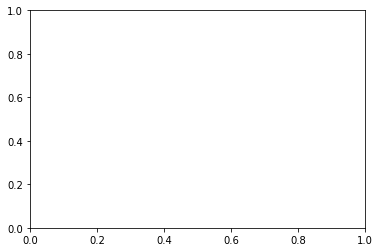

In [75]:
# Univariate plot
sns.distplot(df[])